In [26]:
ifile = "st23_muon_520_10000eve.root" 
#ifile = "Brem_2.550000_z500_600_eps_-4.2.root" 

In [27]:
# import libraries
import uproot3 as uproot
import uproot as uproot4
import numpy as np
import numba
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys
#import pandas as pd
from scipy.stats import halfnorm
from sklearn.cluster import KMeans
import random
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from lmfit import Model
import copy
#import ROOT
#from coffea import hist

In [28]:
# Process Data
def getData(fname="", procName="Events"):
    kn_dict = uproot.open(fname)["Events"].arrays()
    kn_dict_ak1 = {name.decode(): ak.from_awkward0(array) for name, array in kn_dict.items()}
    kn_events = ak.zip({"Tracks":ak.zip({
                                        "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "truthtrack_x_st3":   kn_dict_ak1["truthtrack_x_st3"],
                                        "truthtrack_y_st3":   kn_dict_ak1["truthtrack_y_st3"],
                                        "truthtrack_z_st3":   kn_dict_ak1["truthtrack_z_st3"],
                                        "truthtrack_x_st1":   kn_dict_ak1["truthtrack_x_st1"],
                                        "truthtrack_y_st1":   kn_dict_ak1["truthtrack_y_st1"],
                                        "truthtrack_z_st1":   kn_dict_ak1["truthtrack_z_st1"],
                                        "truthtrack_x_vtx":   kn_dict_ak1["truthtrack_x_vtx"],
                                        "truthtrack_y_vtx":   kn_dict_ak1["truthtrack_y_vtx"],
                                        "truthtrack_z_vtx":   kn_dict_ak1["truthtrack_z_vtx"],
                                      }),
                        "RecoTracks":ak.zip({
                                      "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "track_x_CAL":   kn_dict_ak1["track_x_CAL"],
                                        "track_y_CAL":   kn_dict_ak1["track_y_CAL"],
                                        "track_pz":      kn_dict_ak1["track_pz_st3"],
                                        "track_px":      kn_dict_ak1["track_px_st3"],
                                        "track_py":      kn_dict_ak1["track_py_st3"],
                                        "track_x_st3":      kn_dict_ak1["track_x_st3"],
                                        "track_y_st3":      kn_dict_ak1["track_y_st3"],
                                        "track_z_st3":      kn_dict_ak1["track_z_st3"]
                                      }),
                        "Electrons":ak.zip({
                                            "ge":      kn_dict_ak1["ge"],
                                            "gvx":      kn_dict_ak1["gvx"],
                                            "gvy":      kn_dict_ak1["gvy"],
                                            "gvz":      kn_dict_ak1["gvz"],
                                            "gpx":      kn_dict_ak1["gpx"],
                                            "gpy":      kn_dict_ak1["gpy"],
                                            "gpz":      kn_dict_ak1["gpz"],
                                        }),
                        "Hits":ak.zip({
                                      "detID":   kn_dict_ak1["hit_detID"],
                                      "edep":    kn_dict_ak1["hit_edep"],
                                      "elmID":   kn_dict_ak1["hit_elmID"],
                                      "truthx":  kn_dict_ak1["hit_truthx"],
                                      "truthy":  kn_dict_ak1["hit_truthy"],
                                      "truthz":  kn_dict_ak1["hit_truthz"],
                                      "hit_pos":  kn_dict_ak1["hit_pos"],
                                      }),
                        "Cal_Position":ak.zip({
                                            "track_x_CAL":      kn_dict_ak1["track_x_CAL"],
                                            "track_y_CAL":     kn_dict_ak1["track_y_CAL"],
                                        }),
                        "St23_Tracklet":ak.zip({
                                        "n_tracks":   kn_dict_ak1["n_tracks"],
                                        "st23tracklet_nhits_st1":   kn_dict_ak1["st23tracklet_nhits_st1"],
                                        "st23tracklet_nhits_st2":   kn_dict_ak1["st23tracklet_nhits_st2"],
                                        "st23tracklet_nhits_st3":   kn_dict_ak1["st23tracklet_nhits_st3"],
                                        "st23tracklet_px_st1":   kn_dict_ak1["st23tracklet_px_st1"],
                                        "st23tracklet_px_st3":   kn_dict_ak1["st23tracklet_px_st3"],
                                        "st23tracklet_py_st1":   kn_dict_ak1["st23tracklet_py_st1"],
                                        "st23tracklet_py_st3":   kn_dict_ak1["st23tracklet_py_st3"],
                                        "st23tracklet_pz_st1":   kn_dict_ak1["st23tracklet_pz_st1"],
                                        "st23tracklet_pz_st3":   kn_dict_ak1["st23tracklet_pz_st3"],
                                        "st23tracklet_x_st1":   kn_dict_ak1["st23tracklet_x_st1"],
                                        "st23tracklet_x_st3":   kn_dict_ak1["st23tracklet_x_st3"],
                                        "st23tracklet_x_CAL":   kn_dict_ak1["st23tracklet_x_CAL"],
                                        "st23tracklet_y_st1":   kn_dict_ak1["st23tracklet_y_st1"],
                                        "st23tracklet_y_st3":   kn_dict_ak1["st23tracklet_y_st3"],
                                        "st23tracklet_y_CAL":   kn_dict_ak1["st23tracklet_y_CAL"],
                                        "st23tracklet_z_st1":   kn_dict_ak1["st23tracklet_z_st1"],
                                        "st23tracklet_z_st3":   kn_dict_ak1["st23tracklet_z_st3"],  
                                        }),
                    
                       }, depth_limit=1)
    return kn_events

In [29]:
#import n-tuple
kn_events = getData(ifile,"Events")

In [30]:
print(kn_events[:15]["St23_Tracklet"].st23tracklet_nhits_st2)
print(kn_events[:15]["St23_Tracklet"].st23tracklet_z_st1)

[[6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6]]
[[1.32e+03], [1.31e+03], [1.32e+03], ... [1.32e+03], [1.31e+03], [1.31e+03]]


In [31]:
pz = []
for i in range(len(kn_events[:]["St23_Tracklet"].n_tracks)):
    for j in range(len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3)):
        pz.append(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3[j])
x_track = []
y_track = []

for i in range(len(kn_events[:]["St23_Tracklet"].n_tracks)):
    if len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3) > 0:
        for k in range(len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3)):
            x_track.append(kn_events[i]["St23_Tracklet"].st23tracklet_x_CAL[k])
            y_track.append(kn_events[i]["St23_Tracklet"].st23tracklet_y_CAL[k])

In [32]:
# Create selections/masks
def emcal_selection(arr):
    mask = (arr.detID == 100)
    return mask

def h2_selection(arr):
    mask = (arr.detID >= 35) & (arr.detID <= 38)
    return mask

def st2_selection(arr):
    mask = (arr.detID >= 13) & (arr.detID <= 18)
    return mask

def st3_selection(arr):
    mask = (arr.detID >= 19) & (arr.detID <= 30)
    return mask

def h4_selection(arr):
    mask = (arr.detID >= 41) & (arr.detID <= 46)
    return mask

In [33]:
ntowersx=72
ntowersy=36
sizex=5.53 # in cm
sizey=5.53 # in cm

ecalx=[-200,200] #size in cm
ecaly=[-100,100]
binsx=ecalx[1]-ecalx[0]
binsy=ecaly[1]-ecaly[0]
sfc = 0.1146337964120158

In [34]:

passed = 0
failed = 0
no_track = 0
identification = []
failed_energy = []
energy = []
h4_hits = []
for i in range(len(kn_events[:]["St23_Tracklet"].n_tracks)):
    kn_hits = kn_events[i]["Hits"]
    
    emcal_mask = emcal_selection(kn_hits)
    emcal_hits = kn_hits[emcal_mask]
    emcal_towerx = emcal_hits.elmID//ntowersy
    emcal_towery = emcal_hits.elmID%ntowersy
    emcal_truthx = emcal_hits.truthx
    emcal_truthy = emcal_hits.truthy
    emcal_x = ecalx[0]+emcal_towerx*sizex
    emcal_y = ecaly[0]+emcal_towery*sizey
    emcal_edep = emcal_hits.edep
    
    num_h4_hits = len(kn_hits[h4_selection(kn_hits)])
    h4_hits.append(num_h4_hits)
    
    X = np.vstack((np.array(emcal_x), np.array(emcal_y))).T

    event_id = []
    event_failed_energy = []
    event_energy = []
    if len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3) == 0:
        #failed +=1
        no_track += 1
        #event_id.append(0)
        identification.append(event_id)
        continue
        
    if len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3) > 0:
        for k in range(len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3)):
            cluster_energy = 0
            pz = kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3[k]
            x_pos = kn_events[i]["St23_Tracklet"].st23tracklet_x_CAL[k]
            y_pos = kn_events[i]["St23_Tracklet"].st23tracklet_y_CAL[k]
            for j in range(len(np.array(emcal_x))):
                #
                if (abs(X[:,0][j] - x_pos) <= 50) and (abs(X[:,1][j] - y_pos) <= 30):
                    cluster_energy += emcal_edep[j]
            event_energy.append((cluster_energy/sfc) / (pz))
            if ((cluster_energy/sfc) / (pz) <= 1.8) and ((cluster_energy/sfc) / (pz) >= .9):
                #passed += 1
                event_id.append(1) # electron
                failed += 1
            elif ((cluster_energy/sfc) / (pz) <.9) and ((cluster_energy/sfc) / (pz) >= .2):
                failed += 1
                event_id.append(3) # pion
            elif ((cluster_energy/sfc) / (pz) < .2):
                if (num_h4_hits >= 11) or (num_h4_hits < 3):
                    failed += 1
                    event_id.append(3) # pion
                else:
                    passed += 1
                    event_id.append(2) # muon
            else:
                failed += 1
                event_id.append(1) # electron
                event_failed_energy.append(cluster_energy)
    identification.append(event_id)
    failed_energy.append(event_failed_energy)
    energy.append(event_energy)
        
print(passed)
print(failed)
print(no_track)
print(passed+failed+no_track)
print(passed/(failed+passed))

9042
987
2
10031
0.9015854023332336


In [35]:
id_eff = []
for i in identification:
    if len(i) > 0:
        for j in i:
            if j == 1:
                id_eff.append(1)
            else:
                id_eff.append(0)

In [36]:
print(len(id_eff))
print(len(x_track))
print(len(y_track))


10029
10029
10029


In [37]:
pz = []
for i in range(len(kn_events[:]["St23_Tracklet"].n_tracks)):
    for j in range(len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3)):
        pz.append(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3[j])
x_track = []
y_track = []

for i in range(len(kn_events[:]["St23_Tracklet"].n_tracks)):
    if len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3) > 0:
        for k in range(len(kn_events[i]["St23_Tracklet"].st23tracklet_pz_st3)):
            x_track.append(kn_events[i]["St23_Tracklet"].st23tracklet_x_CAL[k])
            y_track.append(kn_events[i]["St23_Tracklet"].st23tracklet_y_CAL[k])

In [38]:
pz_array = np.array(pz)
x_track_array = np.array(x_track)
y_track_array = np.array(y_track)
id_eff_array = np.array(id_eff)

In [39]:
sfc = 0.1146337964120158
ntowersx=72
ntowersy=36
sizex=5.53 # in cm
sizey=5.53 # in cm

ecalx=[-200,200] #size in cm
ecaly=[-100,100]
binsx=ecalx[1]-ecalx[0]
binsy=ecaly[1]-ecaly[0]

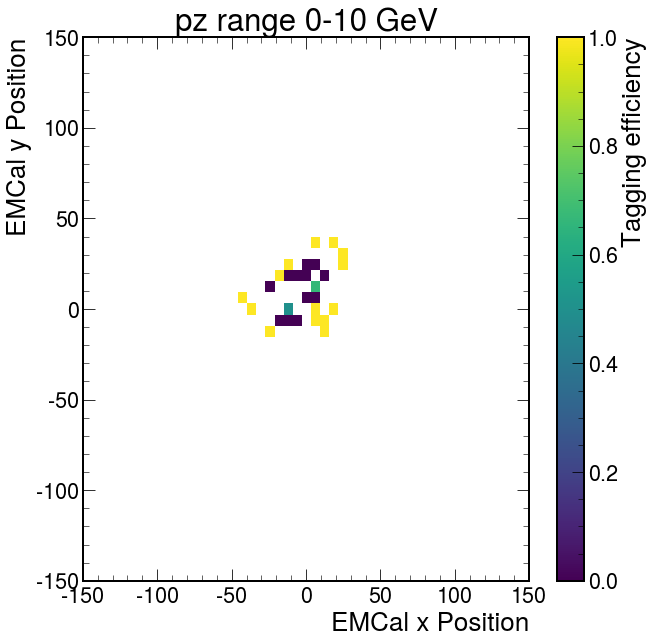

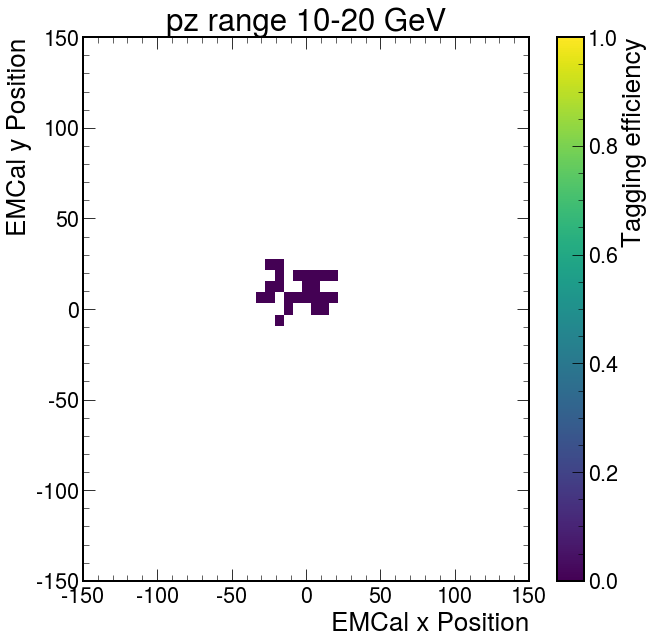

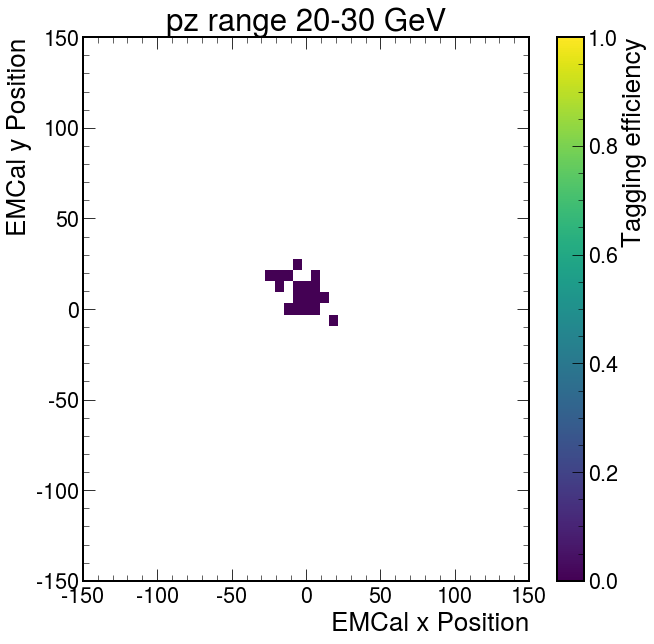

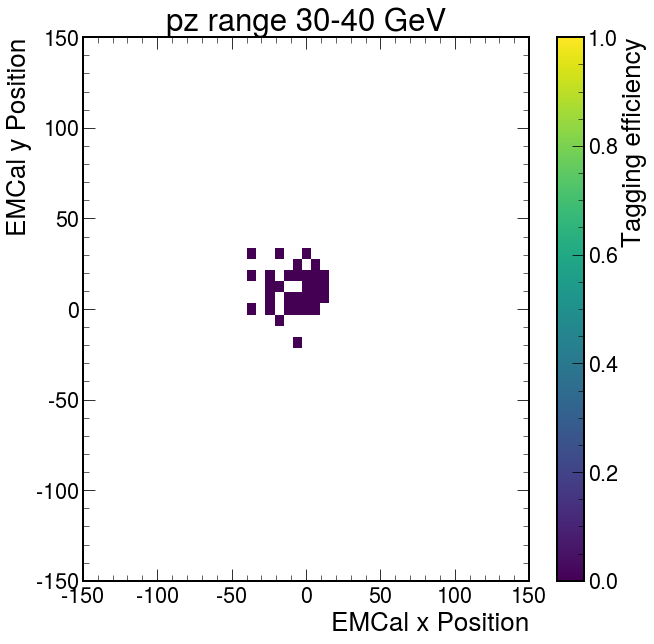

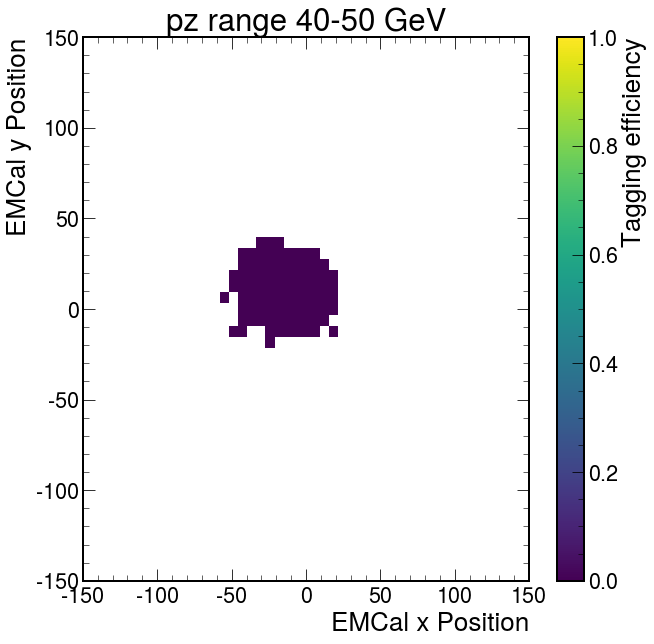

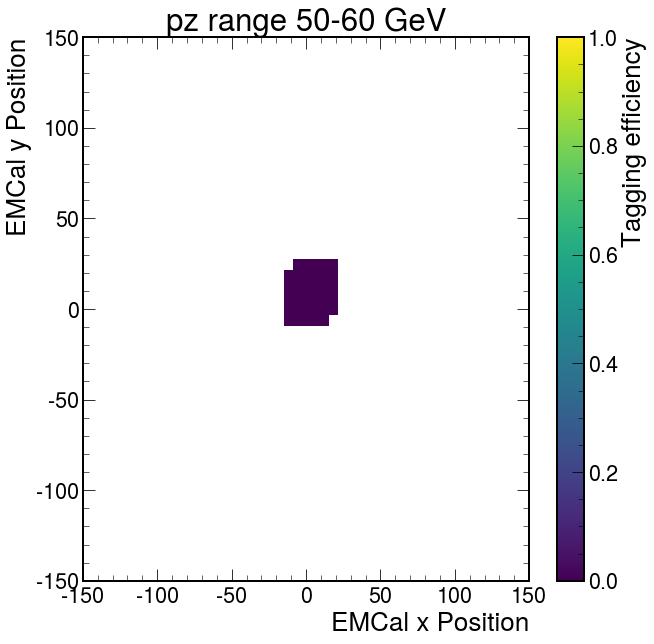

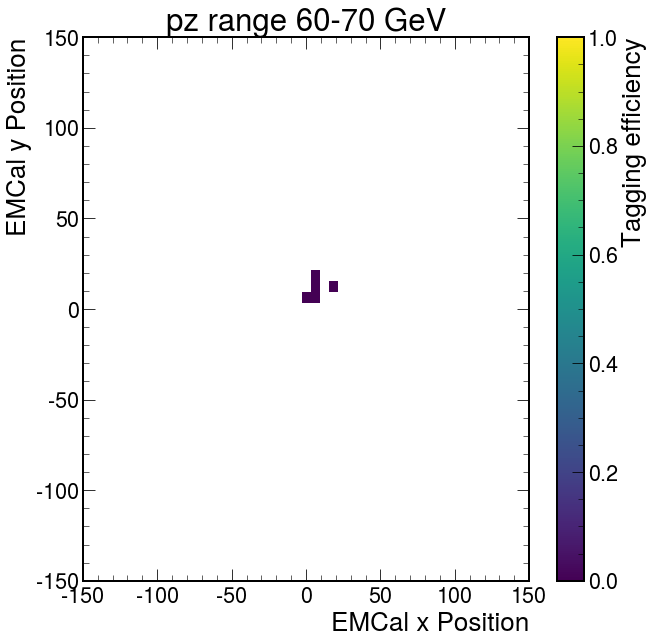

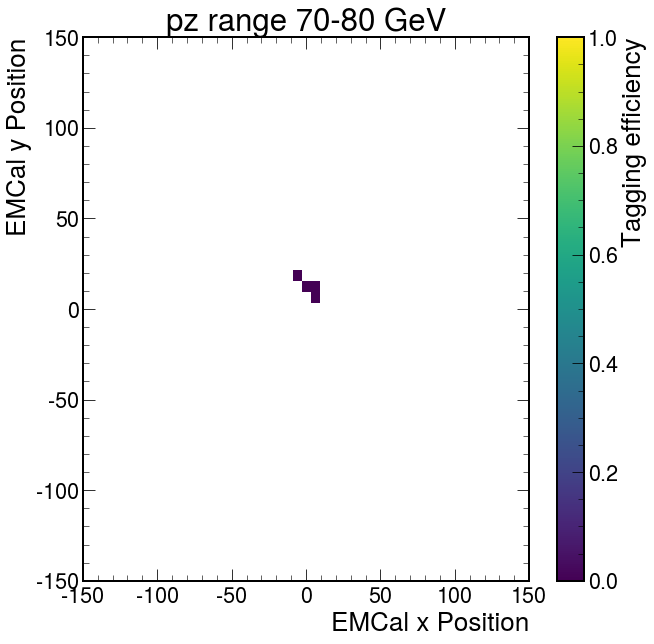

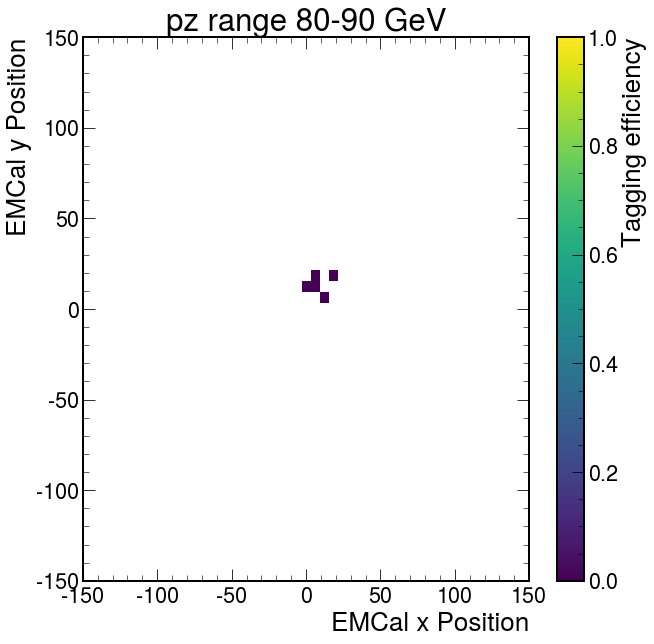

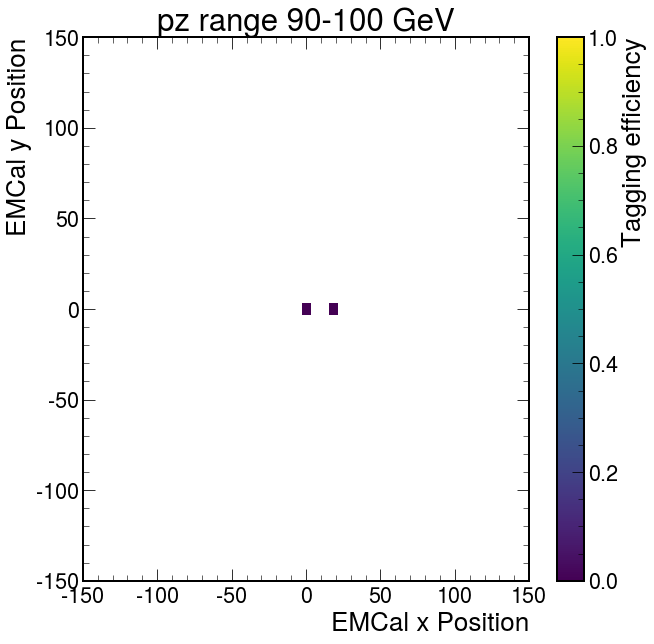

In [41]:
for i in [0,1,2,3,4,5,6,7,8,9]:
    e_range = 10
    e_min = i*e_range
    e_max = (i+1)*e_range
    
    local_selection = (pz_array >= e_min) & (pz_array < e_max)
    
    x_bins = np.linspace(-150, 150, 50)
    y_bins = np.linspace(-150, 150, 50)
    bin_means = binned_statistic_2d(x_track_array[local_selection], y_track_array[local_selection], id_eff_array[local_selection], statistic='mean',bins=[x_bins, y_bins])
    im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-150, 150, -150, 150), aspect='auto')
    #cax = plt.axes([.95, .15, .075, .7])
    #plt.colorbar(cax=cax)
    plt.colorbar(im, label='Tagging efficiency')
    plt.clim(0.,1.)
    plt.xlabel('EMCal x Position')
    plt.ylabel('EMCal y Position')
    plt.title('pz range {}-{} GeV'.format(e_min,e_max))
    plt.show()